# (Non)Linear model

In this Jupyter Notebook an example of [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), a simple machine learning model, will be presented. The Linear Regression algorithm will be applied to the hydrological data.
The following Python (3.10) libraries were used:
pandas, numpy, scikit-learn, and matplotlib. The notebook is divided in 3 sections:
1. load the desired data,
2. create a linear model,
3. create a non-linear model.

In [14]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

## Load the desired data

In [ ]:
directory = "./"
curr_file = 'Hydro.xlsx'
filenoext, fileext = os.path.splitext(curr_file)

# (optionally) convert xlsx to csv
xls_file = pd.ExcelFile(curr_file)
df = xls_file.parse('Sheet1')
file_name = filenoext + '.csv'
df.to_csv(file_name)

# read data
date = np.array([]); river_flow = np.array([]); production = np.array([]);
with open(file_name, "r") as csvfile:
    datareader = csv.reader(csvfile, delimiter = ',', quotechar = '|') 
    for row in islice(datareader, 1, None): #skip the headers
        if any(el == '' for el in row):
            continue
        else:
            date = np.append(date, row[1])
            river_flow = np.append(river_flow, float(row[2]))
            production = np.append(production, float(row[3]))

## Create the Linear Regression model

The equation of linear regression method describes the relationship between a dependent ($y$) and independent variables ($x$) as well as its error component ($\epsilon$).
$$
y = \beta_0 + \beta_1 \cdot x_1 + \cdots + \epsilon
$$
$\beta_0$ represents Y intercept and $\beta_i$ slope coefficients.

Production vs. river flow 4000 [m^3/s]:  11871.356154011097
Production vs. river flow 10000 [m^3/s]:  26775.762283105774
R^2:  0.9134646873579427
MAE: 956.724171978304
RMSE: 1334.9093063202454


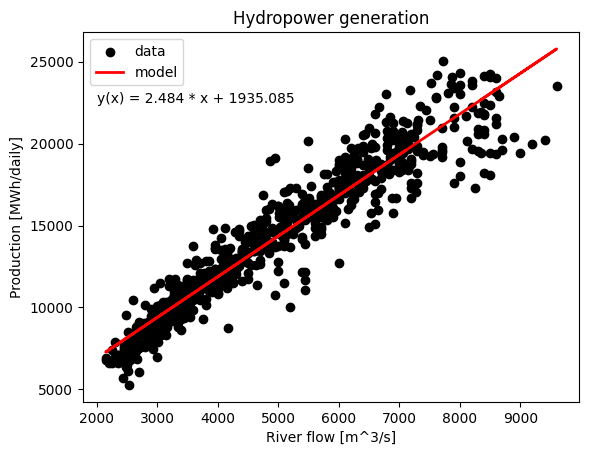

In [22]:
x = river_flow.reshape(-1, 1)
y = production.reshape(-1, 1)

regress = LinearRegression()  
regress.fit(x, y)
b0 = regress.intercept_
# print('Intercept: ', b0)
b1 = regress.coef_
# print('Slope coefficient: ', b1)
eq = ''.join(['y(x) = ', str(round(b1[0][0],3)), ' * x + ', str(round(b0[0],3))])
y_4000 = b1[0][0] * 4000 + b0[0]
print('Production vs. river flow 4000 [m^3/s]: ', y_4000)
y_10000 = b1[0][0] * 10000 + b0[0]
print('Production vs. river flow 10000 [m^3/s]: ', y_10000)
y_pred = regress.predict(x)

print('R^2: ', metrics.r2_score(y, y_pred))
print('MAE:', metrics.mean_absolute_error(y, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

plt.figure(1)
plt.scatter(x, y,  color='black', label='data')
plt.plot(x, y_pred, color='red', linewidth=2, label='model')
plt.xlabel("River flow [m^3/s]")
plt.ylabel("Production [MWh/daily]")
plt.title('Hydropower generation')
plt.text(2000, 22500, eq)
plt.legend()
plt.show()

## Create non-linear model

Using [Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) with the Linear Regression method give higher $R^2$ score and lower MAE, RMSE. In the example below, degree of the polynomial features is three.

R^2:  0.9265732811885041
MAE:  873.0886426581341
RMSE:  1229.6517663542263


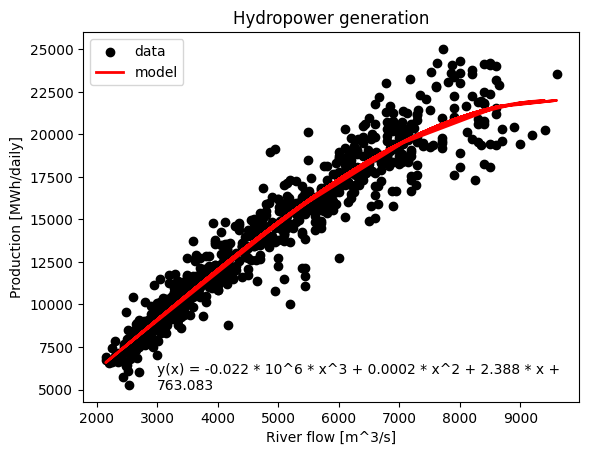

In [23]:
coeff = np.polyfit(river_flow, production, 3)
# print('Coefficients: ', coeff)
neq = ''.join(['y(x) = ', str(round(np.multiply(coeff[0], 1000000.0), 3)), ' * 10^6 * x^3 + ', str(round(coeff[1], 4)), ' * x^2 + ', str(round(coeff[2], 3)), ' * x + \n', str(round(coeff[3], 3))])
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(x, y)
y_pred = model.predict(x)

print('R^2: ', metrics.r2_score(y, y_pred))
print('MAE: ', metrics.mean_absolute_error(y, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_pred)))

plt.figure(2)
plt.scatter(x, y, color='black', label='data')
plt.plot(x, y_pred, color='red', linewidth=2, label='model')
plt.xlabel("River flow [m^3/s]")
plt.ylabel("Production [MWh/daily]")
plt.title('Hydropower generation')
plt.text(3000, 5000, neq)
plt.legend()
plt.show()